<a href="https://colab.research.google.com/github/nachomon13/IA/blob/main/stroke_arbol_TODAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recolectamos los datos para desarrollar nuestro modelo predictivo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
df=pd.read_csv('/content/drive/MyDrive/INTELIGENCIA ARTIFICIAL/Árboles de decisión/Clasificacion/stroke.csv')
import matplotlib.pyplot as plt
import math
import seaborn as sns

#ATENCIÓN CLASES DESBALANCEADAS#

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


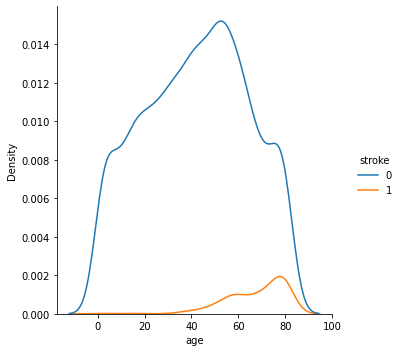

In [ ]:
sns.displot(data=df, x="age", hue="stroke", kind="kde")

<AxesSubplot:ylabel='age'>

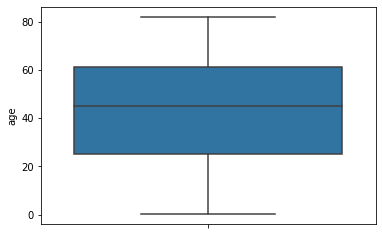

In [ ]:
#sns.boxplot(x="avg_glucose_level",y="stroke",data=df)
sns.boxplot(y =df['age'])

In [ ]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df = df.dropna(subset=["bmi"])
df.isna().sum()
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Creamos el modelo de REGRESION LOGISTICA

Eliminación de OUTLIERS por Rango Intercuartílico.

In [ ]:
Q1=np.quantile(df['bmi'],0.25)
Q1

23.5

In [ ]:
Q3=np.quantile(df['bmi'],0.75)
Q3

33.1

In [ ]:
IQR=Q3-Q1

In [ ]:
sup=Q3+1.5*IQR
print(sup)

47.5


In [ ]:
inf=Q1-1.5*IQR
print(inf)

9.099999999999998


In [ ]:
bmi_v=np.array(df['bmi'])

In [ ]:
inferior =np.where(df['bmi'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [ ]:
superior = np.where(df['bmi'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  17,   53,   94,  214,  218,  230,  293,  301,  317,  388,  419,
        423,  448,  493,  498,  549,  576,  591,  616,  624,  666,  710,
        754,  809,  872,  945, 1003, 1019, 1174, 1191, 1201, 1235, 1252,
       1423, 1449, 1452, 1477, 1482, 1493, 1502, 1513, 1557, 1573, 1686,
       1797, 1884, 1911, 1961, 1965, 1975, 2019, 2027, 2121, 2165, 2172,
       2177, 2196, 2215, 2294, 2324, 2421, 2431, 2443, 2460, 2597, 2636,
       2685, 2708, 2748, 2761, 2884, 2917, 3063, 3083, 3088, 3150, 3178,
       3280, 3348, 3381, 3427, 3444, 3524, 3537, 3655, 3697, 3738, 3759,
       3784, 3805, 3894, 3949, 3977, 4010, 4030, 4044, 4046, 4168, 4222,
       4224, 4271, 4290, 4347, 4462, 4515, 4588, 4646, 4655, 4666, 4714,
       4757, 4813, 4859]),)


In [ ]:
df.drop(df[(df['bmi'] > sup) | (df['bmi'] < inf)].index, inplace=True)

<AxesSubplot:ylabel='bmi'>

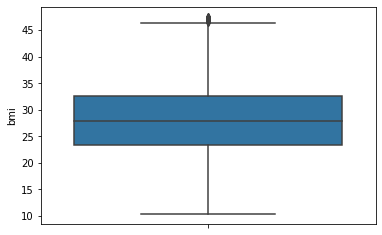

In [ ]:
#sns.boxplot(x="avg_glucose_level",y="stroke",data=df)
sns.boxplot(y=df['bmi'])

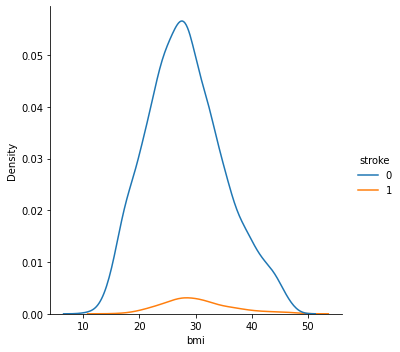

In [ ]:
sns.displot(data=df, x="bmi", hue="stroke", kind="kde")

In [ ]:
#localizamos las categoricas y object


In [ ]:
#Vamos a seleccionar las carxcaterísticas para mi modelo y la clase 
caracteristicas=df[['age','heart_disease','ever_married','avg_glucose_level','bmi','smoking_status']]
clase=df['stroke']

In [ ]:
caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4799 non-null   float64
 1   heart_disease      4799 non-null   int64  
 2   ever_married       4799 non-null   object 
 3   avg_glucose_level  4799 non-null   float64
 4   bmi                4799 non-null   float64
 5   smoking_status     4799 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 391.5+ KB


Cambiamos las características tipo object a tipo string

In [ ]:
column_txt=caracteristicas.select_dtypes(include='object').columns
column_txt

Index(['ever_married', 'smoking_status'], dtype='object')

In [ ]:
caracteristicas[column_txt]=caracteristicas[column_txt].astype('string')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
column_txt=caracteristicas.select_dtypes('string').columns.to_list()

In [ ]:
column_txt

['ever_married', 'smoking_status']

##Codificamos las variables categóricas

In [ ]:
caracteristicas_code=pd.get_dummies(caracteristicas,columns=column_txt,drop_first=False)
caracteristicas_code.head()

,age,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,1,228.69,36.6,0,1,0,1,0,0
2,80.0,1,105.92,32.5,0,1,0,0,1,0
3,49.0,0,171.23,34.4,0,1,0,0,0,1
4,79.0,0,174.12,24.0,0,1,0,0,1,0
5,81.0,0,186.21,29.0,0,1,0,1,0,0


##Observa que solo tenemos números en mi tabla de caracteristicas,


#Tengo que concatenar esta tabla con mi columna de las y (clase) para crear el dataframe de trabajo codificado.

In [ ]:
df_code=pd.concat([caracteristicas_code,clase],axis=1)
df_code.head()

,age,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,1,228.69,36.6,0,1,0,1,0,0,1
2,80.0,1,105.92,32.5,0,1,0,0,1,0,1
3,49.0,0,171.23,34.4,0,1,0,0,0,1,1
4,79.0,0,174.12,24.0,0,1,0,0,1,0,1
5,81.0,0,186.21,29.0,0,1,0,1,0,0,1


##Vemos como existen grandes diferencias entre los valores de las características, lo que nos puede plantear problemas en el funcionamiento de los modelos.
Para solventarlo 
## ESCALADO DE CARACTERÍSTICAS

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_code_scal = scaler.fit_transform(df_code)

### Convertimos el array obtenido en un nuevo dataframe

In [ ]:
df_code_scal = pd.DataFrame(df_code_scal)
df_code_scal.columns = df_code.columns

In [ ]:
df_code_scal.head()

,age,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.816895,1.0,0.801265,0.706989,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,1.0,0.234512,0.596774,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.597168,0.0,0.536008,0.647849,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.963379,0.0,0.549349,0.368280,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.987793,0.0,0.605161,0.502688,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Ya tenemos todos los valores del dataframe con valores comprendidos entre cero y uno.

Extraemos ahora las nuevas features y target para entrenar el modelo

Atributos o variables explicativas filtramos las 10 primeras columnas, para el target cogemos la última columna.

In [ ]:
features=df_code_scal.iloc[:, :10]
target=df_code_scal['stroke']
features, target

(           age  heart_disease  avg_glucose_level       bmi  ever_married_No  \
 0     0.816895            1.0           0.801265  0.706989              0.0   
 1     0.975586            1.0           0.234512  0.596774              0.0   
 2     0.597168            0.0           0.536008  0.647849              0.0   
 3     0.963379            0.0           0.549349  0.368280              0.0   
 4     0.987793            0.0           0.605161  0.502688              0.0   
 ...        ...            ...                ...       ...              ...   
 4794  0.157715            0.0           0.221402  0.223118              1.0   
 4795  0.987793            0.0           0.323516  0.798387              0.0   
 4796  0.426270            0.0           0.128658  0.545699              0.0   
 4797  0.621582            0.0           0.513203  0.411290              0.0   
 4798  0.536133            0.0           0.139230  0.427419              0.0   
 
       ever_married_Yes  smoking_statu

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

## CLASES DESBALANCEADAS
Esto introduce sesgo en los modelos que los hace inviables.Muy común en el ámbito de la salud, muy pocos pacientes pertenecen a la clase que marca una patología.

TENEMOS QUE SOLVENTAR EL TEMA DE CLASES DESBALANCEADAS.

<AxesSubplot:xlabel='stroke', ylabel='count'>

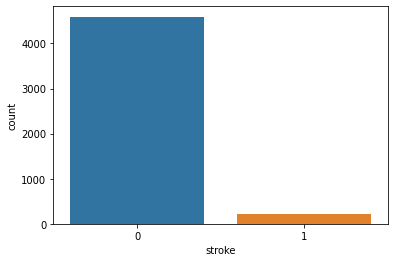

In [ ]:
sns.countplot(x='stroke', data=df)

In [ ]:
print(df['stroke'].value_counts())

0    4592
1     207
Name: stroke, dtype: int64


La clase positiva en ictus sólo tiene 207 registros frente a los 4592 de la clase negativa.Existe un sesgo de negatividad muy peligroso a la hora de utilizar estos datos para un modelo de diagnóstico para esta patología.
Quiere decir que va a predecir muy bien los negativos y muy mal los positivos, todo lo contarrio de lo pretendido.

Vamos a entrenar un modelo de regresión logistica,  primero sin corregir este desbalanceo de clases y estudiaremos las métricas extraidas del modelo para luego sacar nuestras conclusiones.
Posteriormente corregiremos el desbalanceo de las clases con alguna de las técnicas más habituales y veremos métrivas de validación comparadas con el caso anterior.

##ENTRENO EL MODELO en este caso ARBOL DE DECISIÓN

Instancimos mi arbol

In [ ]:
mi_arbol=DecisionTreeClassifier(max_depth=3,criterion='gini',class_weight='balanced', splitter='best')

## Hacemos predicciopnes sobre los datos de test

In [ ]:
mi_arbol=mi_arbol.fit(X_train,y_train)

In [ ]:
y_pred=mi_arbol.predict(X_test)

##REPRESENTACIÓN DEL ARBOL

In [ ]:
texto_modelo = export_text(
                    decision_tree = mi_arbol,
                    feature_names = list(features.columns)
               )
print(texto_modelo)

|--- age <= 0.65
|   |--- age <= 0.46
|   |   |--- avg_glucose_level <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- avg_glucose_level >  0.01
|   |   |   |--- class: 0.0
|   |--- age >  0.46
|   |   |--- avg_glucose_level <= 0.23
|   |   |   |--- class: 0.0
|   |   |--- avg_glucose_level >  0.23
|   |   |   |--- class: 0.0
|--- age >  0.65
|   |--- age <= 0.82
|   |   |--- avg_glucose_level <= 0.14
|   |   |   |--- class: 0.0
|   |   |--- avg_glucose_level >  0.14
|   |   |   |--- class: 1.0
|   |--- age >  0.82
|   |   |--- avg_glucose_level <= 0.35
|   |   |   |--- class: 1.0
|   |   |--- avg_glucose_level >  0.35
|   |   |   |--- class: 1.0



In [ ]:
print(f"Profundidad del árbol: {mi_arbol.get_depth()}")
print(f"Número de nodos terminales: {mi_arbol.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


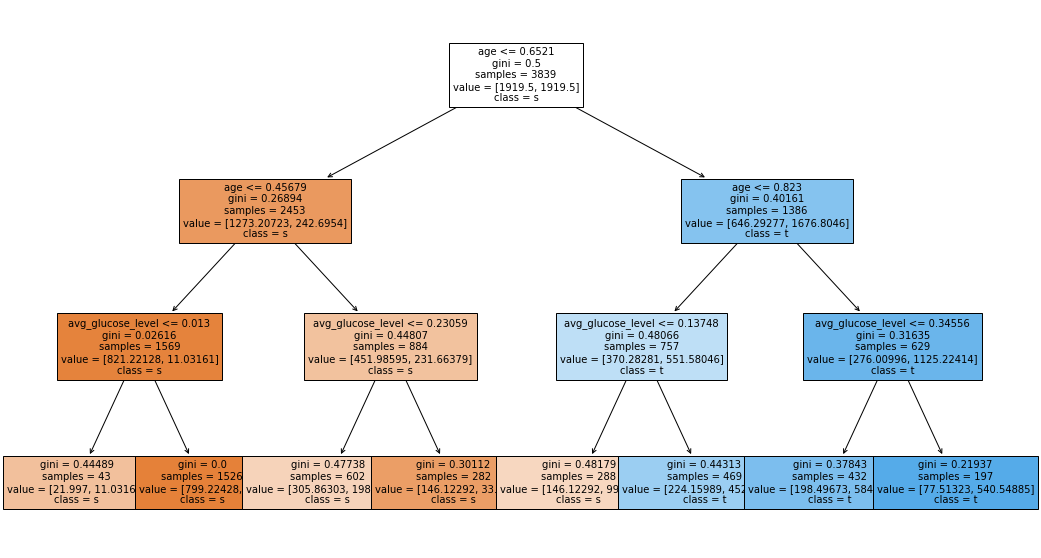

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 10))
plot = plot_tree (decision_tree = mi_arbol,feature_names = features.columns,class_names='stroke',filled = True,impurity =True,fontsize = 10,precision = 5,ax = ax)

Expresamos las predicciones como probabilidad de éxito en la clsificación de la clase.

In [ ]:
mi_arbol.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.12541334, 0.87458666],
       [0.81533733, 0.18466267]])

In [ ]:
print(y_test.value_counts())

0.0    927
1.0     33
Name: stroke, dtype: int64


In [ ]:
  acc_log=[]
  print(classification_report(y_test,y_pred))
  acc=roc_auc_score(y_test,y_pred)
  acc_log.append(acc)

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84       927
         1.0       0.10      0.88      0.18        33

    accuracy                           0.73       960
   macro avg       0.55      0.80      0.51       960
weighted avg       0.96      0.73      0.81       960



 ## Veamos las métricas de evaluación del modelo elegido.

##MATRIZ DE CONFUSIÓN##

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
MC = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

In [ ]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_test,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["PP", "PF"],
    index=["P", "F"],
)

,PP,PF
P,29,4
F,258,669


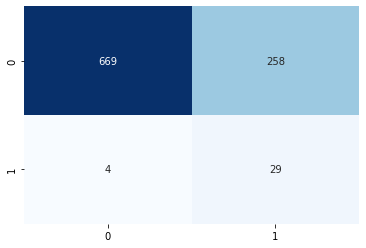

In [ ]:
sns.heatmap(
    MC,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()


demasiados 1|1


Hay 915 negativos reales\
Hay  45 positivos reales

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7270833333333333


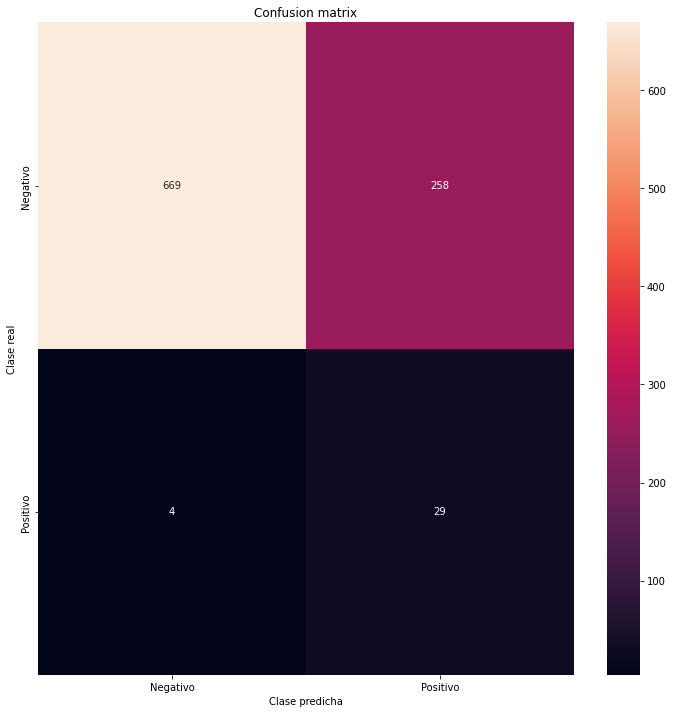

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84       927
         1.0       0.10      0.88      0.18        33

    accuracy                           0.73       960
   macro avg       0.55      0.80      0.51       960
weighted avg       0.96      0.73      0.81       960



In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = mi_arbol.predict(X_test)
mostrar_resultados(y_test, y_pred)

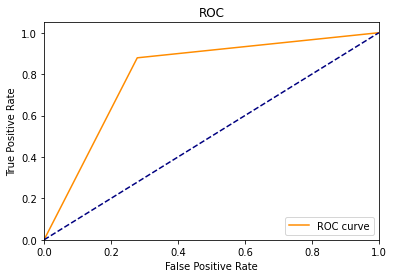

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.8002353633421595

In [ ]:
print('El AUC,  area bajo la curva ROC es: ',roc_auc_score(y_test, y_pred))

El AUC,  area bajo la curva ROC es:  0.8002353633421595
